### Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Traj

I'm not sure which language you favor, but np.loadtext should be able to read these files.


If you are using Python, these are is wrapped into the Python package associated with the paper
https://github.com/williamgilpin/dysts
The tutorial notebook shows how to load precomputed trajectories/splits for individual systems or all 132 systems, as well as how to reintegrate new trajectories for all systems



# Symbolic fluid

/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:260: UserWarning: Expect slowdown due to excessive integration required; scale factor 47394.70108695652
  warnings.warn(
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:287: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


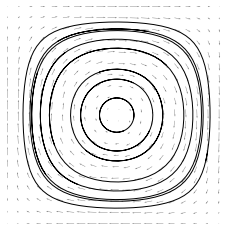

In [145]:
from dysts.flows import DoubleGyre
import degas as dg


np.random.seed(1)
ic_vals = np.array([[0.9, 0.9, 0]]) * np.random.random((8, 3)) + 0.05

eq = DoubleGyre()
eq.dt /= 1000
eq.omega = 0
eq.ic = ic_vals
sol = eq.make_trajectory(86, method="Radau")


# eq = DoubleGyre()
# eq.omega = 1
# eq.eps *= 4
# eq.ic = ic_vals
# sol = eq.make_trajectory(900, method="Radau")
# sol = sol[:, -300:, :]


plt.figure()
plt.plot(sol[..., 0].T, sol[..., 1].T, color='k', linewidth=1);

# dg.fixed_aspect_ratio(1/2)


def make_mesh(xvals, yvals):
    xx, yy = np.meshgrid(xvals, yvals)
    return np.vstack([np.ravel(xx), np.ravel(yy)]).T
mesh_vals = make_mesh(np.linspace(0, 2, 40), np.linspace(0, 1, 20))
field_vals = np.array(
    [eq.rhs(np.array([x, y, 0]), 0)[:2] for (x, y) in mesh_vals]
)
plt.quiver(mesh_vals[:, 0], mesh_vals[:, 1], field_vals[:, 0], field_vals[:, 1], color=(0.5, 0.5, 0.5), width=0.002, scale=7)




plt.xlim([0, 1])
plt.ylim([0, 1])
dg.fixed_aspect_ratio(1)

dg.vanish_axes()
# dg.better_savefig(f"private_dump/simple_flow.png")
# dg.better_savefig(f"private_dump/complex_flow.png")

In [151]:
help(dg.plot3dproj)

Help on function plot3dproj in module degas.degas:

plot3dproj(x, y, z, *args, ax=None, color=(0, 0, 0), shadow_dist=1.0, color_proj=None, elev_azim=(39, -47), show_labels=False, aspect_ratio=1.0, **kwargs)
    Create a three dimensional plot, with projections onto the 2D coordinate
    planes
    
    Parameters
    ----------
    x, y, z : 1D arrays of coordinates to plot
    *args : arguments passed to the matplotlib plt.plot functions
    color : length-3 tuple
        The RGB color (with each element in [0,1]) to use for the
        three dimensional line plot
    color_proj : length-3 tuple
        The RGB color (with each element in [0,1]) to use for the
        two dimensional projection plots. Defaults to a lighter version of the 
        plotting color
    shadow_dist : float
        The relative distance of axes to their shadow. If a single value, 
        then the same distance is used for all three axies. If a triple, then 
        different values are used for all axes
  

In [162]:
ww = [0, 4, 5]

if ww is None:
    print("t")

/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/degas/degas.py:68: UserWarning: Setting aspect ratio is experimental for 3D plots.
  warnings.warn("Setting aspect ratio is experimental for 3D plots.")


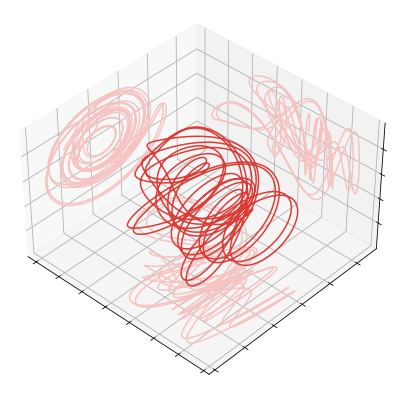

/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/degas/degas.py:68: UserWarning: Setting aspect ratio is experimental for 3D plots.
  warnings.warn("Setting aspect ratio is experimental for 3D plots.")
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/degas/degas.py:68: UserWarning: Setting aspect ratio is experimental for 3D plots.
  warnings.warn("Setting aspect ratio is experimental for 3D plots.")


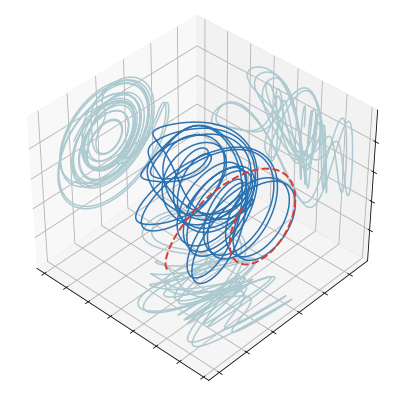

In [42]:
from dysts.flows import Hadley
import degas as dg

eq = Hadley()
sol = eq.make_trajectory(2000)

ax = dg.plot3dproj(
    *sol.T, 
    color=dg.pastel_rainbow[5], 
    shadow_dist=1.5, 
    color_proj=dg.lighter(dg.pastel_rainbow[4], 0.6)
)


eq = Hadley()
eq.ic = sol[1030]*1.09
sol = eq.make_trajectory(70)
ax.plot(*sol.T, "--", color=dg.pastel_rainbow[0], linewidth=2)


dg.fixed_aspect_ratio(1.3)


# dg.better_savefig(f"private_dump/hadley.png")

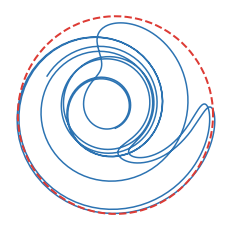

In [58]:
from dysts.flows import Hadley
import degas as dg

eq = Hadley()
sol = eq.make_trajectory(1000)
eq.ic = sol[-1]
sol = eq.make_trajectory(1000)


plt.plot(
    sol[:, 1], 
    sol[:, 2],
    color=dg.pastel_rainbow[5], 
)


# eq = Hadley()
# eq.ic = sol[30]*1.09
# sol = eq.make_trajectory(70)
# plt.plot(sol[:, 1], sol[:, 2], "--", color=dg.pastel_rainbow[0], linewidth=2)
thvals = np.linspace(0, 2*np.pi, 200)
xx, yy = 2 * np.cos(thvals), 2 * np.sin(thvals)
plt.plot(xx+ 0.2, yy, "--", color=dg.pastel_rainbow[0], linewidth=2)

dg.fixed_aspect_ratio(1)
dg.vanish_axes()

dg.better_savefig(f"private_dump/perturb.png")

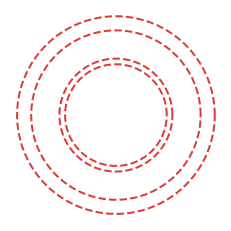

In [65]:
thvals = np.linspace(0, 2*np.pi, 200)
xx, yy = np.cos(thvals), np.sin(thvals)
plt.plot(3*xx, 3*yy, "--", color=dg.pastel_rainbow[0], linewidth=2)
plt.plot(3.5*xx, 3.5*yy, "--", color=dg.pastel_rainbow[0], linewidth=2)

plt.plot(2*xx, 2*yy, "--", color=dg.pastel_rainbow[0], linewidth=2)
plt.plot(1.8*xx, 1.8*yy, "--", color=dg.pastel_rainbow[0], linewidth=2)


dg.fixed_aspect_ratio(1)
dg.fixed_aspect_ratio(1)
dg.vanish_axes()
dg.better_savefig(f"private_dump/upo.png")

# ECG example

In [122]:
coords = np.load("private_dump/coords_lstm_ecg.pkl", allow_pickle=True)
coords_plt = coords[1000:2000, [1, 2]]
from scipy.signal import savgol_filter, resample

coords_plt = np.array(
    [savgol_filter(resample(row, 10000), 51, 3) for row in coords_plt.T]
).T

In [124]:
def import_ecg(ind=2):
    """
    https://www.physionet.org/content/qtdb/1.0.0/
    true timestep is 0.004 s
    """
    all_vals = list()
    TRAIN_TIME = 100
    with open('private_dump/sel10' + str(ind) + '.dat', mode='rb') as file: # b is important -> binary
        fc = file.read()
        for line in fc:
            all_vals.append(line)
    all_vals = np.array(all_vals)
    # SAMPLE_WINDOW = 1000
    # data = scipy.signal.medfilt(all_vals[:100000],311)[::10]
    data = all_vals
    data = savgol_filter(data, 15, 3)[::10]
    return data

# ecg_coords = np.loadtxt("private_dump/ECG5000_TEST.txt")
ecg_coords = import_ecg()

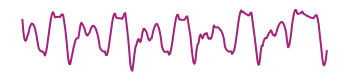

In [135]:
plt.plot(savgol_filter(ecg_coords, 11, 3)[:300],
        color=dg.pastel_rainbow[7],
        linewidth=2)
dg.vanish_axes()
dg.fixed_aspect_ratio(1/5)

# dg.better_savefig(f"private_dump/ecg_data_example.png")

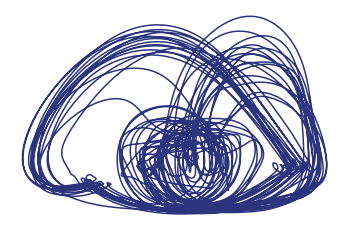

In [136]:
plt.plot(coords_plt[:, 0], 
         coords_plt[:, 1], 
         color=dg.pastel_rainbow[6]
        )
dg.vanish_axes()

# dg.better_savefig(f"private_dump/ecg_example.png")

# Forecast results

In [223]:
import os
import json

GRANULARITY = 100

with open(
    os.getcwd()
    + "/results/results_test_univariate__pts_per_period_" + str(GRANULARITY) 
    + "__periods_12.json",
    "r",
) as file:
    all_results = json.load(file)


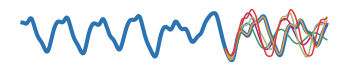

In [317]:
equation_name = "MackeyGlass"


from dysts.datasets import load_file
cwd = os.getcwd()
input_path = os.path.dirname(cwd)  + "/dysts/data/test_univariate__pts_per_period_100__periods_12.json"
equation_data = load_file(input_path)
prev_vals = np.array(equation_data.dataset["MackeyGlass"]["values"])
split_point = int(5/6 * len(prev_vals))
prev_vals = prev_vals[:split_point]

prev_vals = prev_vals[-400:]

true_vals = np.array(all_results[equation_name]["values"])
plt.plot(np.hstack([prev_vals, true_vals]), 
         linewidth=4,
         zorder=-30,
         color=dg.pastel_rainbow[5])

plt_models = ["TransformerModel", 
              "NBEATSModel",
              "RNNModel",  
              "ARIMA", 
              "LinearRegressionModel"]
for i, model_name in enumerate(plt_models):
    if i == 4:
        i = 7
    plt.plot(len(prev_vals) + np.arange(len(true_vals) + 1),
             all_results[equation_name][model_name]["prediction"],
            color=dg.pastel_rainbow[i],
             zorder=-i
            )
dg.vanish_axes()
dg.fixed_aspect_ratio(1/6)


dg.better_savefig(f"private_dump/forecast_examples.png", dpi=800)

0
1
2
3
4


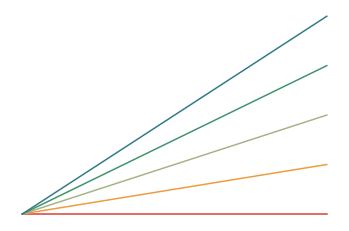

In [315]:
for i in range(len(plt_models)):
    print(i)
    plt.plot(i * np.linspace(0, 1, 100), color=dg.pastel_rainbow[i])
dg.vanish_axes()

# Lyapunov 

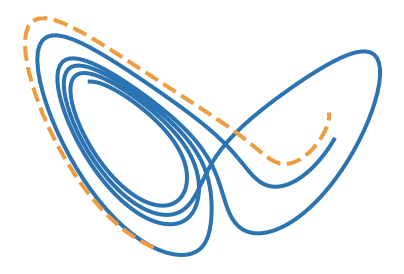

In [161]:
plt.figure(figsize=(7, 7))
eq = Lorenz()
sol = eq.make_trajectory(int(5.12 * 200), standardize=False, pts_per_period=200)
plt.plot(sol[-600:, 0], sol[-600:, 2], color=dg.pastel_rainbow[5], linewidth=4)
eq.ic = sol[-100, :] * np.array([1, 1.5, 1])
sol = eq.make_trajectory(100, standardize=False, pts_per_period=200)
plt.plot(sol[:, 0], sol[:, 2], "--", color=dg.pastel_rainbow[1], linewidth=4)
dg.vanish_axes()
dg.fixed_aspect_ratio(1/1.5)
# dg.better_savefig(f"private_dump/forecast.png")

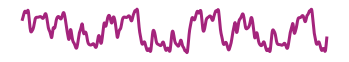

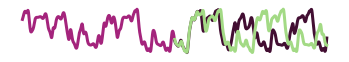

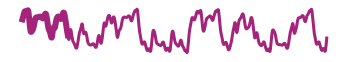

In [208]:
eq = Thomas()
sol = eq.make_trajectory(1000)
plt.figure()
plt.plot(sol[:1000, 0], color=dg.pastel_rainbow[7], linewidth=3)
dg.vanish_axes()
dg.fixed_aspect_ratio(1/7)
# dg.better_savefig(f"private_dump/jump_ts.png")


eq = Thomas()
eq.ic = sol[499] + np.array([0, 0.05, 0.05])
sol2 = eq.make_trajectory(500)
plt.figure()
plt.plot(sol[:500, 0], color=dg.pastel_rainbow[7], linewidth=3)
plt.plot(500 + np.arange(500), sol[500:, 0], color=dg.darker(dg.pastel_rainbow[7], 0.6), linewidth=3)
plt.plot(500 + np.arange(500), sol2[:, 0], color=dg.pastel_rainbow[9], linewidth=3)
dg.vanish_axes()
dg.fixed_aspect_ratio(1/7)
# dg.better_savefig(f"private_dump/jump_ts_perturb.png")


eq = Thomas()
sol = eq.make_trajectory(1000)
plt.figure()
plt.plot(sol[:, 0], color=dg.pastel_rainbow[7], linewidth=3)

plt.plot(sol[:150, 0], color=dg.pastel_rainbow[7], linewidth=6)
dg.vanish_axes()
dg.fixed_aspect_ratio(1/7)

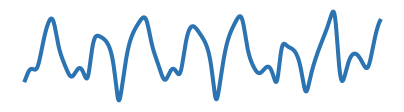

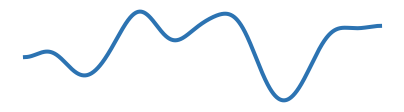

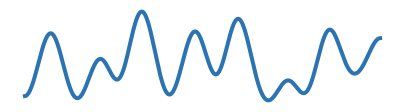

In [222]:
plt.figure(figsize=(7, 7))
eq = Halvorsen()
sol = eq.make_trajectory(1500, standardize=False, pts_per_period=200)
plt.plot(sol[:, 0], color=dg.pastel_rainbow[5], linewidth=4)
# eq.ic = sol[-100, :] * np.array([1, 1.5, 1])
# sol = eq.make_trajectory(100, standardize=False, pts_per_period=200)
# plt.plot(sol[:, 0], sol[:, 2], "--", color=dg.pastel_rainbow[1], linewidth=4)
dg.vanish_axes()
dg.fixed_aspect_ratio(1/4)
dg.better_savefig(f"private_dump/residual_final.png")

from scipy.ndimage import gaussian_filter1d

plt.figure(figsize=(7, 7))
plt.plot(gaussian_filter1d(sol[:, 0], 100), color=dg.pastel_rainbow[5], linewidth=4)
dg.vanish_axes()
dg.fixed_aspect_ratio(1/4)
dg.better_savefig(f"private_dump/residual_coarse.png")


plt.figure(figsize=(7, 7))
plt.plot(gaussian_filter1d(sol[:, 0], 50), color=dg.pastel_rainbow[5], linewidth=4)
dg.vanish_axes()
dg.fixed_aspect_ratio(1/4)
dg.better_savefig(f"private_dump/residual_fine.png")

In [ ]:
plt.figure(figsize=(7, 7))
eq = Halvorsen()
sol = eq.make_trajectory(1500, standardize=False, pts_per_period=200)
plt.plot(sol[:, 0], color=dg.pastel_rainbow[5], linewidth=4)
# eq.ic = sol[-100, :] * np.array([1, 1.5, 1])
# sol = eq.make_trajectory(100, standardize=False, pts_per_period=200)
# plt.plot(sol[:, 0], sol[:, 2], "--", color=dg.pastel_rainbow[1], linewidth=4)
dg.vanish_axes()
dg.fixed_aspect_ratio(1/4)
dg.better_savefig(f"private_dump/residual_final.png")

from scipy.ndimage import gaussian_filter1d

plt.figure(figsize=(7, 7))
plt.plot(gaussian_filter1d(sol[:, 0], 100), color=dg.pastel_rainbow[5], linewidth=4)
dg.vanish_axes()
dg.fixed_aspect_ratio(1/4)
dg.better_savefig(f"private_dump/residual_coarse.png")


plt.figure(figsize=(7, 7))
plt.plot(gaussian_filter1d(sol[:, 0], 50), color=dg.pastel_rainbow[5], linewidth=4)
dg.vanish_axes()
dg.fixed_aspect_ratio(1/4)
dg.better_savefig(f"private_dump/residual_fine.png")

# Importance sampling

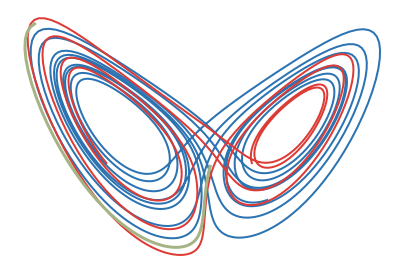

In [54]:
import degas as dg
from dysts.flows import *

plt.figure(figsize=(7, 7))

eq = Lorenz()
sol = eq.make_trajectory(8 * 200, standardize=False, pts_per_period=200)
plt.plot(sol[:, 0], sol[:, 2], color=dg.pastel_rainbow[5], linewidth=2)
# plt.plot(sol[:, 0], sol[:, 2], '.', color=dg.pastel_rainbow[5], markersize=10)
new_ic = sol[-35]

eq = Lorenz()
eq.sigma /= 1.2
sol = eq.make_trajectory(4 * 200, standardize=False, pts_per_period=200)
plt.plot(sol[:, 0], sol[:, 2], color=dg.pastel_rainbow[0], linewidth=2)


eq = Lorenz()
eq.ic = new_ic
sol = eq.make_trajectory(200, standardize=False, pts_per_period=200)
plt.plot(sol[100:, 0], sol[100:, 2], color=dg.pastel_rainbow[2], linewidth=3)


dg.vanish_axes()
dg.fixed_aspect_ratio(1/1.5)
# dg.better_savefig(f"private_dump/resample.png")

# Fractal diagram

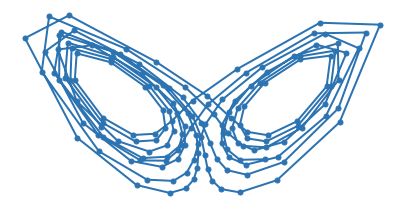

In [35]:
import degas as dg
from dysts.flows import *

plt.figure(figsize=(7,7))

ptval = 20
sol = Lorenz().make_trajectory(8 * ptval, standardize=True, pts_per_period=ptval)
plt.plot(sol[:, 0], sol[:, 2], color=dg.pastel_rainbow[5], linewidth=2)
plt.plot(sol[:, 0], sol[:, 2], '.', color=dg.pastel_rainbow[5], markersize=10)

dg.vanish_axes()
dg.fixed_aspect_ratio(1/2)
dg.better_savefig(f"private_dump/fractal{ptval}.png")

# Banner image

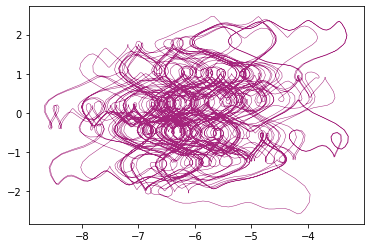

In [33]:
plt.plot(-6 + sol[:, 0], sol[:, 1], color=dg.pastel_rainbow[7], linewidth=0.5)


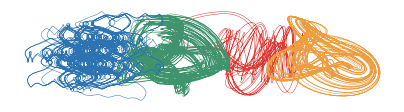

In [34]:
import degas as dg
from dysts.flows import *

plt.figure(figsize=(7,7))

sol = Hadley().make_trajectory(5000, standardize=True)
plt.plot(sol[:, 0], sol[:, 1], color=dg.pastel_rainbow[0], linewidth=0.5)

sol = Halvorsen().make_trajectory(5000, standardize=True)
plt.plot(3 + sol[:, 0], sol[:, 1], color=dg.pastel_rainbow[1], linewidth=0.5)

sol = Lorenz96().make_trajectory(5000, standardize=True)
plt.plot(-3 + sol[:, 0], sol[:, 1], color=dg.pastel_rainbow[3], linewidth=0.5)

sol = ThomasLabyrinth().make_trajectory(5000, standardize=True)
plt.plot(-6 + sol[:, 0], sol[:, 1], color=dg.pastel_rainbow[5], linewidth=0.5)

dg.fixed_aspect_ratio(1/4)
dg.vanish_axes()

dg.better_savefig("private_dump/banner.png")

# Fractal image

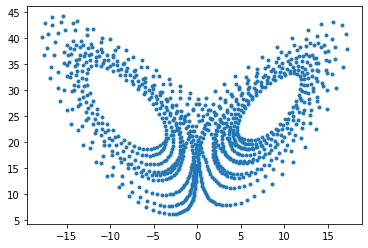

In [20]:
plt.plot(sol[::4, 0], sol[::4, 2], '.')

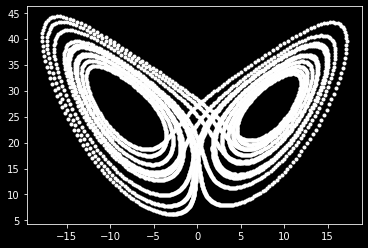

In [39]:
plt.plot(sol[::gran, 0], sol[::gran, 2], '.w')

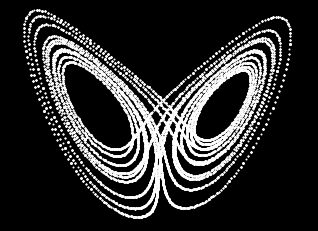

In [41]:
plt.style.use("dark_background")

plt.figure()
for tpt, gran in enumerate(np.arange(1, 51)[::-1]):
#     print(tpt, gran)
    
    plt.plot(sol[::gran, 0], sol[::gran, 2], '.w', markersize=2)
    plt.ylim([5, 45])
    plt.xlim([-20, 20])
    dg.fixed_aspect_ratio(1 / 1.4)
    dg.vanish_axes()
    dg.better_savefig("private_dump/frame_" + str(tpt).zfill(4) + ".png", 
                      pad_inches=0.001)
#     plt.close()
    

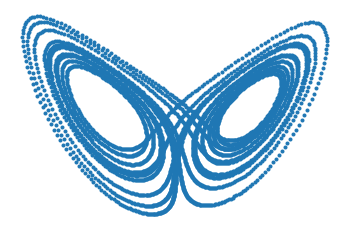

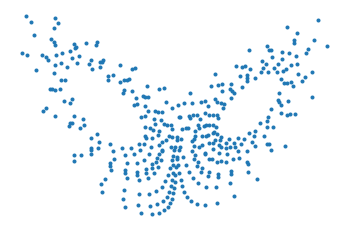

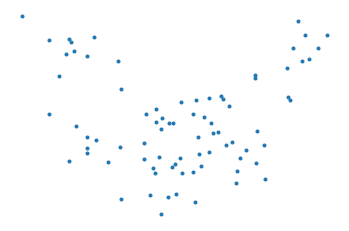

In [13]:
from dysts.flows import Lorenz
import degas as dg

eq = Lorenz()
sol = eq.make_trajectory(4000, pts_per_period=400)

plt.figure()
plt.plot(sol[:, 0], sol[:, 2], '.')
dg.vanish_axes()

plt.figure()
plt.plot(sol[::10, 0], sol[::10, 2], '.')
dg.vanish_axes()

plt.figure()
plt.plot(sol[::50, 0], sol[::50, 2], '.')
dg.vanish_axes()

# Video of attractors

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:

Lorenz().ic.shape

(3,)

In [12]:
tt = getattr(dysts.flows, equation_name)()

In [53]:
from dysts.flows import Lorenz, MackeyGlass

eq = MackeyGlass()
eq.ic = np.random.random((10, 11))
qq = eq.make_trajectory(21,
                        pts_per_period=20, 
                        resample=False,
                        standardize=False
                       )
print(qq.shape)


eq2 = Lorenz()
eq2.ic = np.random.random((11, 3))
qq2 = eq2.make_trajectory(21,
                          pts_per_period=20, 
                              resample=False,
                              standardize=False
                             )
print(qq2.shape)

ValueError: operands could not be broadcast together with shapes (11,) (1611,) 

In [ ]:
def gradcheck(func, jac, vals, eps=1e-8):
    """
    Given two functions, check that the second function
    correctly computes the gradient of the first
    """
    
    if len(np.squeeze(vals).shape) == 1:
        

In [31]:
eq.ic = np.random.random(20)
vecs = eq.make_trajectory(21,
                          pts_per_period=20, 
                          resample=False,
                          standardize=False
                         )

Aizawa
AnishchenkoAstakhov
Arneodo
ArnoldBeltramiChildress


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


ArnoldWeb


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


BeerRNN
BelousovZhabotinsky


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:232: UserWarning: Expect slowdown due to excessive integration required; scale factor 1190.4668753260303
  warnings.warn(


BickleyJet


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


Blasius
BlinkingRotlet


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


BlinkingVortex


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


Bouali
Bouali2
BurkeShaw
CaTwoPlus
CaTwoPlusQuasiperiodic
CellCycle
CellularNeuralNetwork
Chen
ChenLee
Chua
CircadianRhythm


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


CoevolvingPredatorPrey
Colpitts
Coullet
Dadras
DequanLi
DoubleGyre


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


DoublePendulum


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


Duffing


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


ExcitableCell
Finance
FluidTrampoline


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


ForcedBrusselator


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


ForcedFitzHughNagumo


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


ForcedVanDerPol


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:232: UserWarning: Expect slowdown due to excessive integration required; scale factor 1021.2242522573364
  warnings.warn(
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


GenesioTesi
GuckenheimerHolmes
Hadley
Halvorsen
HastingsPowell
HenonHeiles
HindmarshRose
Hopfield
HyperBao
HyperCai
HyperJha
HyperLorenz
HyperLu
HyperPang
HyperQi
HyperRossler
HyperWang
HyperXu
HyperYan
HyperYangChen
IkedaDelay
IsothermalChemical
ItikBanksTumor
JerkCircuit
KawczynskiStrizhak
Laser
LiuChen


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:232: UserWarning: Expect slowdown due to excessive integration required; scale factor 1351.382333108564
  warnings.warn(


Lorenz
Lorenz84
Lorenz96
LorenzBounded
LorenzCoupled
LorenzStenflo
LuChen
LuChenCheng
MacArthur
MackeyGlass
MooreSpiegel
MultiChua
NewtonLiepnik
NoseHoover
NuclearQuadrupole
OscillatingFlow


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


PanXuZhou
PehlivanWei
PiecewiseCircuit
Qi
QiChen
RabinovichFabrikant
RayleighBenard
RikitakeDynamo
Rossler
Rucklidge
Sakarya
SaltonSea
SanUmSrisuchinwong
ScrollDelay
ShimizuMorioka
SprottA
SprottB
SprottC
SprottD
SprottDelay
SprottE
SprottF
SprottG
SprottH
SprottI
SprottJ
SprottJerk
SprottK
SprottL
SprottM
SprottMore
SprottN
SprottO
SprottP
SprottQ
SprottR
SprottS
SprottTorus
StickSlipOscillator


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


SwingingAtwood


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: 

Thomas


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


ThomasLabyrinth
Torus
Tsucs2
TurchinHanski


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


VallisElNino


/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(


VossDelay
WangSun
WindmiReduced
YuWang
YuWang2
ZhouChen


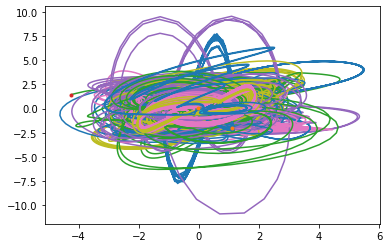

In [66]:
from dysts.base import get_attractor_list, make_trajectory_ensemble
import dysts.flows
from dysts.utils import standardize_ts

all_sol = list()
for equation_name in get_attractor_list()[:]:
    print(equation_name, flush=True)

#     if equation_name != "MackeyGlass":
#         continue

    eq = getattr(dysts.flows, equation_name)()
    sol = eq.make_trajectory(1000, pts_per_period=40, resample=True, standardize=False)

#     if eq.delay:
#         vecs = list()
#         for ic_val in sol:
#             eq.ic = ic_val
#             # sol[:, -1][None, :]
#             vecs.append(
#                 eq.make_trajectory(
#                     2, pts_per_period=20, resample=False, standardize=False
#                 )
#             )
#         vecs = np.vstack(vecs)
#     else:
#         eq.ic = sol
#         vecs = eq.make_trajectory(
#             2, pts_per_period=20, resample=False, standardize=False
#         )
#     print("Closest IC found.", flush=True)
    
    if not eq.delay:
        eq.ic = sol
        vecs = eq.make_trajectory(
            2, pts_per_period=20, resample=False, standardize=False
        )
        vecs = np.squeeze(np.diff(vecs, axis=1))[:, :2]
        vecs /= np.linalg.norm(vecs, axis=1)[:, None]

        guide_vec = np.zeros(vecs.shape[1])
        guide_vec[0] = 1
        min_inds = np.argsort(np.linalg.norm(standardize_ts(sol[:, :2]), axis=-1))[:10]
        max_min_ind = np.argmax(vecs.dot(guide_vec)[min_inds])
        best_ind = min_inds[max_min_ind]

        best_ind = np.argmin(np.linalg.norm(standardize_ts(sol[:, :2]), axis=-1))

        eq.ic = eq.ic[best_ind]

    sol = eq.make_trajectory(
        2 * 2500,
        pts_per_period=2 * 200,
        method="Radau",
        resample=True,
        standardize=True,
    )

    all_sol.append(sol)

    plt.plot(sol[:, 0], sol[:, 1])
    plt.plot(sol[0, 0], sol[0, 1], ".")


#     break

# all_trajectories = make_trajectory_ensemble(100,
#                                             pts_per_period=5,
#                                             method="Radau",
#                                             resample=True)

In [74]:
np.random.seed(14)
np.random.shuffle(all_sol)

fade = np.linspace(0, 1, 20)[None, None, :]

all_sol_flat = np.dstack([item[:, :2] for item in all_sol])
all_interpolated_pairs = list()
for i in range(all_sol_flat.shape[-1] - 1):
    pair_interpolated = all_sol_flat[..., i][..., None] * (1 - fade) + all_sol_flat[
        ..., (i + 1)
    ][..., None] * (fade)
    all_interpolated_pairs.append(pair_interpolated)
all_interpolated_pairs = np.dstack(all_interpolated_pairs)

In [75]:
all_panels = np.array_split(all_interpolated_pairs, 3, axis=-1)
minlen = min([item.shape[-1] for item in all_panels])
all_panels = [item[..., :minlen] for item in all_panels]

In [77]:
import degas as dg

plt.style.use("dark_background")

all_colors = [dg.pastel_rainbow[4], dg.pastel_rainbow[0], dg.pastel_rainbow[3]]
for i, panel_set in enumerate(np.stack(all_panels).T):
    plt.figure()
    for j, pts in enumerate(panel_set.T):
        plt.plot(4 * j + pts[:, 0], pts[:, 1], linewidth=1.4, color=all_colors[j])
    dg.fixed_aspect_ratio(1 / 2.5)
    dg.vanish_axes()
    dg.better_savefig("private_dump/frame_" + str(i).zfill(4) + ".png")
    plt.close()

In [262]:
# ffmpeg -r 20 -i frame_%04d.png -vcodec libx264 -pix_fmt yuv420p -crf 25 my_video.mp4


## Flow videos

    ffmpeg -r 20 -i frame_%04d.png -vcodec libx264 -pix_fmt yuv420p -crf 25 -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" my_video.mp4
    
    
    


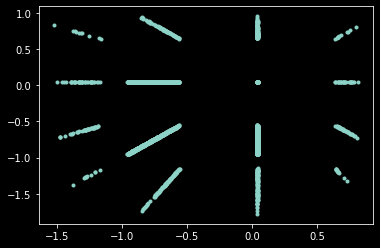

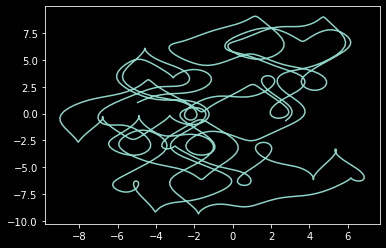

In [287]:
import dysts.flows
eq = dysts.flows.ThomasLabyrinth()
sol = eq.make_trajectory(1000, pts_per_period=200, 
                         postprocess=False,
                         resample=True, standardize=False)

# lo, hi = np.min(np.min(sol, axis=0)), np.max(np.max(sol, axis=0))
# xx, yy = np.meshgrid(np.linspace(lo, hi, 50), 
#                      np.linspace(lo, hi, 50))
# ic_set = np.vstack([np.ravel(xx), np.ravel(yy), np.zeros_like(np.ravel(xx))]).T
# ic_set = (hi - lo) * (np.random.random((3, 2000)) - 0.5).T

n_pts = 3000
ic_set = np.sin(
    (2 * np.pi / 3) *
    np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))*np.std(sol, axis=0)
)


ic_set = np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))


samp = 0.1 * np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))
samp -= np.mod(samp, 0.6 + 0.4 * np.random.random(len(samp))[:, None])
ic_set = samp + 0.005 * np.ptp(sol, axis=0) * (0.5 - np.random.normal(scale=0.02, size=(n_pts, sol.shape[-1])))

plt.figure()
plt.plot(ic_set[:, 0], ic_set[:, 1], '.')
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

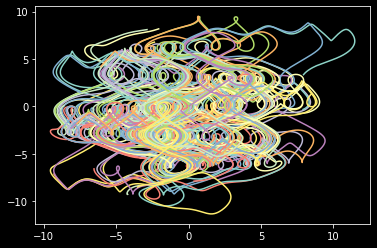

In [288]:
eq.ic = ic_set
# Thomas
# sol = eq.make_trajectory(400, pts_per_period=600, resample=True, standardize=False)
# Hadley
# sol = eq.make_trajectory(800, pts_per_period=100, resample=True, standardize=False)

sol = eq.make_trajectory(800, pts_per_period=900, resample=True, standardize=False)

plt.plot(sol[:100, :, 0].T, sol[:100, :, 1].T);

In [289]:
import degas as dg

plt.style.use("dark_background")

all_colors = [dg.pastel_rainbow[4], dg.pastel_rainbow[0], dg.pastel_rainbow[3]]
tlen = sol.shape[1]
streak_length = 50
for tpt in range(tlen - streak_length)[::100]:
# for tpt in range(tlen - streak_length):
    plt.figure()
    
    plt.plot(sol[:2000, tpt:tpt + streak_length, 0].T, 
             sol[:2000, tpt:tpt + streak_length, 1].T, 
             'w',
             linewidth=0.1
            );
    
#     plt.xlim([1.1*lo, 1.1*hi])
#     plt.ylim([1.1*lo, 1.1*hi])
#     dg.fixed_aspect_ratio(1)
    
    
#     plt.xlim([0.8*np.min(sol[..., 0]), 0.9*np.max(sol[..., 0])])
#     plt.ylim([0.8*np.min(sol[..., 1]), np.max(sol[..., 1])])
#     dg.fixed_aspect_ratio(1/1.2)

    
    solp = sol[:2000, :]
    plt.xlim([np.min(solp[..., 0]), np.max(solp[..., 0])])
    plt.ylim([np.min(solp[..., 1]), np.max(solp[..., 1])])
    dg.fixed_aspect_ratio(1/1.2)
    
    dg.vanish_axes()
    dg.better_savefig("private_dump/frame_" + str(tpt).zfill(4) + ".png", pad_inches=0.001)
    plt.close()

In [183]:
## Plot points
import degas as dg

plt.style.use("dark_background")

all_colors = [dg.pastel_rainbow[4], dg.pastel_rainbow[0], dg.pastel_rainbow[3]]
tlen = sol.shape[1]
for tpt in range(tlen):
    plt.figure()
    
    plt.plot(sol[:, tpt, 0], sol[:, tpt, 1], '.w', markersize=1);
    
    plt.xlim([1.1*lo, 1.1*hi])
    plt.ylim([1.1*lo, 1.1*hi])
    dg.fixed_aspect_ratio(1)

#     plt.xlim([0.6*np.min(sol[..., 0]), 0.8 * np.max(sol[..., 0])])
#     plt.ylim([0.8*np.min(sol[..., 1]), np.max(sol[..., 1])])

    dg.vanish_axes()
    dg.better_savefig("private_dump/frame_" + str(tpt).zfill(4) + ".png", pad_inches=0.001)
    plt.close()

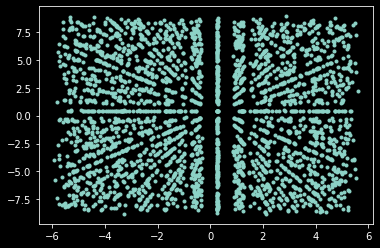

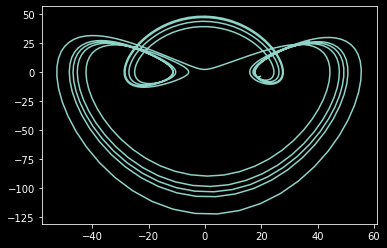

In [290]:
import dysts.flows
eq = dysts.flows.MooreSpiegel()
sol = eq.make_trajectory(1000, pts_per_period=200, 
                         resample=True, standardize=False)

# lo, hi = np.min(np.min(sol, axis=0)), np.max(np.max(sol, axis=0))
# xx, yy = np.meshgrid(np.linspace(lo, hi, 50), 
#                      np.linspace(lo, hi, 50))
# ic_set = np.vstack([np.ravel(xx), np.ravel(yy), np.zeros_like(np.ravel(xx))]).T
# ic_set = (hi - lo) * (np.random.random((3, 2000)) - 0.5).T

n_pts = 3000
ic_set = np.sin(
    (2 * np.pi / 3) *
    np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))*np.std(sol, axis=0)
)


# ic_set = np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))


samp = 0.1 * np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))
samp -= np.mod(samp, 0.6 + 0.4 * np.random.random(len(samp))[:, None])
ic_set = samp + 0.005 * np.ptp(sol, axis=0) * (0.5 - np.random.normal(scale=0.02, size=(n_pts, sol.shape[-1])))

plt.figure()
plt.plot(ic_set[:, 1], ic_set[:, 2], '.')
plt.figure()
plt.plot(sol[:, 1], sol[:, 2])

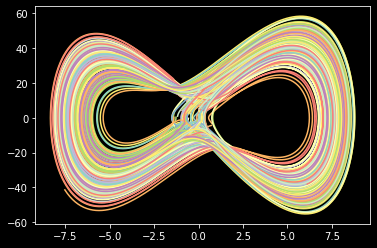

In [291]:
eq.ic = ic_set

sol = eq.make_trajectory(800, pts_per_period=400, resample=True, standardize=False)

plt.plot(sol[:100, :, 0].T, sol[:100, :, 1].T);

In [292]:
import degas as dg

plt.style.use("dark_background")

all_colors = [dg.pastel_rainbow[4], dg.pastel_rainbow[0], dg.pastel_rainbow[3]]
tlen = sol.shape[1]
streak_length = 50
for tpt in range(tlen - streak_length)[::100]:
# for tpt in range(tlen - streak_length):
    plt.figure()
    
    plt.plot(sol[:2000, tpt:tpt + streak_length, 0].T, 
             sol[:2000, tpt:tpt + streak_length, 1].T, 
             'w',
             linewidth=0.1
            );
    
#     plt.xlim([1.1*lo, 1.1*hi])
#     plt.ylim([1.1*lo, 1.1*hi])
#     dg.fixed_aspect_ratio(1)
    
    
#     plt.xlim([0.8*np.min(sol[..., 0]), 0.9*np.max(sol[..., 0])])
#     plt.ylim([0.8*np.min(sol[..., 1]), np.max(sol[..., 1])])
#     dg.fixed_aspect_ratio(1/1.2)

    
    solp = sol[:2000, :]
    plt.xlim([np.min(solp[..., 0]), np.max(solp[..., 0])])
    plt.ylim([np.min(solp[..., 1]), np.max(solp[..., 1])])
    dg.fixed_aspect_ratio(1/1.2)
    
    dg.vanish_axes()
    dg.better_savefig("private_dump/frame_" + str(tpt).zfill(4) + ".png", pad_inches=0.001)
    plt.close()

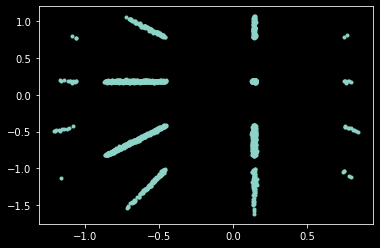

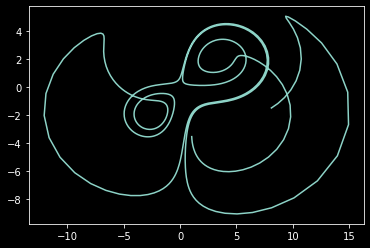

In [7]:
import dysts.flows
eq = dysts.flows.Dadras()
sol = eq.make_trajectory(1000, pts_per_period=200, 
                         resample=True, standardize=False)

# lo, hi = np.min(np.min(sol, axis=0)), np.max(np.max(sol, axis=0))
# xx, yy = np.meshgrid(np.linspace(lo, hi, 50), 
#                      np.linspace(lo, hi, 50))
# ic_set = np.vstack([np.ravel(xx), np.ravel(yy), np.zeros_like(np.ravel(xx))]).T
# ic_set = (hi - lo) * (np.random.random((3, 2000)) - 0.5).T

n_pts = 3000
ic_set = np.sin(
    (2 * np.pi / 3) *
    np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))*np.std(sol, axis=0)
)


# ic_set = np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))


samp = 0.1 * np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))
samp -= np.mod(samp, 0.6 + 0.4 * np.random.random(len(samp))[:, None])
ic_set = samp + 0.02 * np.ptp(sol, axis=0) * (0.5 - np.random.normal(scale=0.02, size=(n_pts, sol.shape[-1])))

plt.figure()
plt.plot(ic_set[:, 1], ic_set[:, 2], '.')
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

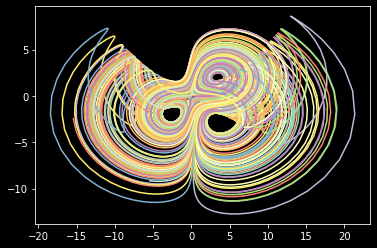

In [8]:
eq.ic = ic_set

sol = eq.make_trajectory(1600, pts_per_period=400, resample=True, standardize=False)
sol = sol[::2]
plt.plot(sol[:100, :, 0].T, sol[:100, :, 1].T);

In [9]:
import degas as dg

plt.style.use("dark_background")

all_colors = [dg.pastel_rainbow[4], dg.pastel_rainbow[0], dg.pastel_rainbow[3]]
tlen = sol.shape[1]
streak_length = 50
# for tpt in range(tlen - streak_length)[::100]:
for tpt in range(tlen - streak_length):
    plt.figure()
    
    plt.plot(sol[:, tpt:tpt + streak_length, 0].T, 
             sol[:, tpt:tpt + streak_length, 1].T, 
             'w',
             linewidth=0.1
            );
    
    
    solp = sol[:2000, :]
    plt.xlim([np.min(solp[..., 0]), np.max(solp[..., 0])])
    plt.ylim([np.min(solp[..., 1]), np.max(solp[..., 1])])
    dg.fixed_aspect_ratio(1/1.2)
    
    dg.vanish_axes()
    dg.better_savefig("private_dump/frame_" + str(tpt).zfill(4) + ".png", pad_inches=0.001)
    plt.close()

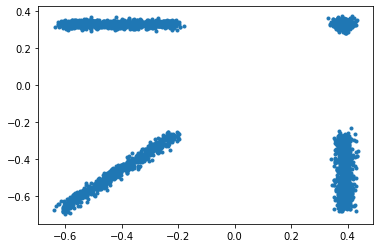

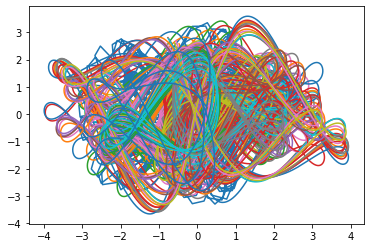

In [2]:
import dysts.flows
eq = dysts.flows.NoseHoover()
sol = eq.make_trajectory(1000, pts_per_period=20, 
                         resample=True, standardize=False)

# lo, hi = np.min(np.min(sol, axis=0)), np.max(np.max(sol, axis=0))
# xx, yy = np.meshgrid(np.linspace(lo, hi, 50), 
#                      np.linspace(lo, hi, 50))
# ic_set = np.vstack([np.ravel(xx), np.ravel(yy), np.zeros_like(np.ravel(xx))]).T
# ic_set = (hi - lo) * (np.random.random((3, 2000)) - 0.5).T

n_pts = 3000
ic_set = np.sin(
    (2 * np.pi / 3) *
    np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))*np.std(sol, axis=0)
)


# ic_set = np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))


samp = 0.1 * np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))
samp -= np.mod(samp, 0.6 + 0.4 * np.random.random(len(samp))[:, None])
ic_set = samp + 0.1 * np.ptp(sol, axis=0) * (0.5 - np.random.normal(scale=0.02, size=(n_pts, sol.shape[-1])))

plt.figure()
plt.plot(ic_set[:, 1], ic_set[:, 2], '.')
plt.figure()
plt.plot(sol[:, 0], sol[:, 2])

eq.ic = ic_set

sol = eq.make_trajectory(1600, pts_per_period=400, resample=True, standardize=False)
sol = sol[::2]
plt.plot(sol[:100, :, 0].T, sol[:100, :, 2].T);

In [6]:
import degas as dg

plt.style.use("dark_background")

all_colors = [dg.pastel_rainbow[4], dg.pastel_rainbow[0], dg.pastel_rainbow[3]]
tlen = sol.shape[1]
streak_length = 200
# for tpt in range(tlen - streak_length)[::100]:
for tpt in range(tlen - streak_length):
    plt.figure()
    
    plt.plot(sol[:, tpt:tpt + streak_length, 0].T, 
             sol[:, tpt:tpt + streak_length, 2].T, 
             'w',
             linewidth=0.05
            );
    
    solp = sol
    plt.xlim([np.min(solp[..., 0]), np.max(solp[..., 0])])
    plt.ylim([np.min(solp[..., 1]), np.max(solp[..., 1])])
    dg.fixed_aspect_ratio(1/1.2)
    
    dg.vanish_axes()
    dg.better_savefig("private_dump/frame_" + str(tpt).zfill(4) + ".png", 
                      pad_inches=0.001, dpi=300)
#     dg.better_savefig("private_dump/frame_" + str(tpt).zfill(4) + ".png", 
#                       pad_inches=0.001, dpi=600)
    plt.close()

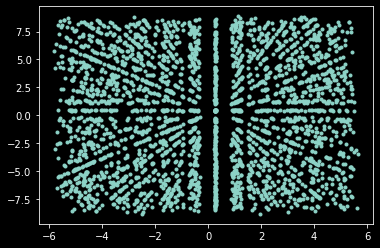

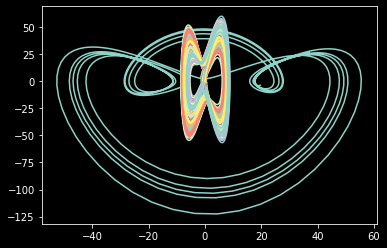

In [11]:
import dysts.flows
eq = dysts.flows.MooreSpiegel()
sol = eq.make_trajectory(1000, pts_per_period=200, 
                         resample=True, standardize=False)

# lo, hi = np.min(np.min(sol, axis=0)), np.max(np.max(sol, axis=0))
# xx, yy = np.meshgrid(np.linspace(lo, hi, 50), 
#                      np.linspace(lo, hi, 50))
# ic_set = np.vstack([np.ravel(xx), np.ravel(yy), np.zeros_like(np.ravel(xx))]).T
# ic_set = (hi - lo) * (np.random.random((3, 2000)) - 0.5).T

n_pts = 3000
ic_set = np.sin(
    (2 * np.pi / 3) *
    np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))*np.std(sol, axis=0)
)


# ic_set = np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))


samp = 0.1 * np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))
samp -= np.mod(samp, 0.6 + 0.4 * np.random.random(len(samp))[:, None])
ic_set = samp + 0.005 * np.ptp(sol, axis=0) * (0.5 - np.random.normal(scale=0.02, size=(n_pts, sol.shape[-1])))

plt.figure()
plt.plot(ic_set[:, 1], ic_set[:, 2], '.')
plt.figure()
plt.plot(sol[:, 1], sol[:, 2])

eq.ic = ic_set

sol = eq.make_trajectory(1600, pts_per_period=400, resample=True, standardize=False)
sol = sol[::2]
plt.plot(sol[:100, :, 0].T, sol[:100, :, 1].T);

In [15]:
import degas as dg

plt.style.use("dark_background")

all_colors = [dg.pastel_rainbow[4], dg.pastel_rainbow[0], dg.pastel_rainbow[3]]
tlen = sol.shape[1]
streak_length = 50
# for tpt in range(tlen - streak_length)[::100]:
for tpt in range(tlen - streak_length):
    plt.figure()
    
    plt.plot(sol[:, tpt:tpt + streak_length, 1].T, 
             sol[:, tpt:tpt + streak_length, 2].T, 
             'w',
             linewidth=0.1
            );
    
    
    solp = sol
    plt.xlim([np.min(solp[..., 1]), np.max(solp[..., 1])])
    plt.ylim([np.min(solp[..., 2]), np.max(solp[..., 2])])
    dg.fixed_aspect_ratio(1/1.2)
    
    dg.vanish_axes()
    dg.better_savefig("private_dump/frame_" + str(tpt).zfill(4) + ".png", pad_inches=0.001)
    plt.close()

In [7]:
plt.figure()

plt.plot(sol[:, tpt:tpt + streak_length, 1].T, 
         sol[:, tpt:tpt + streak_length, 2].T, 
         'w',
         linewidth=0.1
        );


plt.xlim([np.min(solp[..., 1]), np.max(solp[..., 1])])
plt.ylim([np.min(solp[..., 2]), np.max(solp[..., 2])])
dg.fixed_aspect_ratio(1/1.2)
    
dg.vanish_axes()
dg.better_savefig("private_dump/wrap" + str(tpt).zfill(4) + ".png", 
                  pad_inches=0.001, dpi=1200)
plt.close()

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

import dysts.flows


eq = dysts.flows.MacArthur()
eq.ic = np.random.random((10, 10))

sol = eq.make_trajectory(10, pts_per_period=400, resample=True, standardize=False)


In [37]:
eq.ic[0]

array([-0.24987863,  0.06900097,  0.25236551,  0.49946601,  0.30043525,
       -0.6365894 ,  0.00916133,  0.04057194,  0.00717749,  0.01379284])

In [ ]:
ic_set

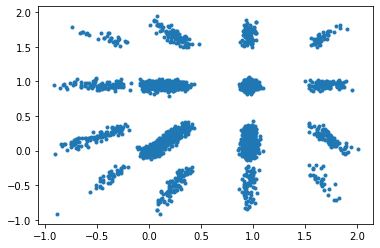

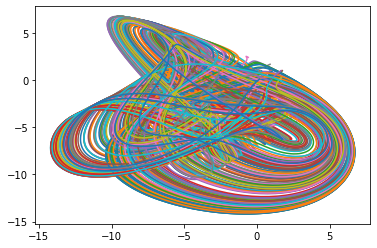

In [4]:
import dysts.flows
eq = dysts.flows.Halvorsen()
sol = eq.make_trajectory(2000, pts_per_period=200, 
                         resample=True, standardize=False)

# lo, hi = np.min(np.min(sol, axis=0)), np.max(np.max(sol, axis=0))
# xx, yy = np.meshgrid(np.linspace(lo, hi, 50), 
#                      np.linspace(lo, hi, 50))
# ic_set = np.vstack([np.ravel(xx), np.ravel(yy), np.zeros_like(np.ravel(xx))]).T
# ic_set = (hi - lo) * (np.random.random((3, 2000)) - 0.5).T

n_pts = 3000
ic_set = np.sin(
    (2 * np.pi / 3) *
    np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))*np.std(sol, axis=0)
)


# ic_set = np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))


samp = 0.1 * np.ptp(sol, axis=0) * (0.5 - np.random.random((n_pts, sol.shape[-1])))
samp -= np.mod(samp, 0.6 + 0.4 * np.random.random(len(samp))[:, None])
ic_set = samp + 0.1 * np.ptp(sol, axis=0) * (0.5 - np.random.normal(scale=0.02, size=(n_pts, sol.shape[-1])))


show_vars = [1, 2]

plt.figure()
plt.plot(ic_set[:, show_vars[0]], ic_set[:, show_vars[1]], '.')
plt.figure()
plt.plot(sol[:, show_vars[0]], sol[:, show_vars[1]])

eq.ic = ic_set

sol = eq.make_trajectory(1600, pts_per_period=400, resample=True, standardize=False)
plt.plot(sol[:100, :, show_vars[0]].T, sol[:100, :, show_vars[1]].T);

In [60]:
sol.shape

(2000, 10)

In [6]:
import degas as dg

plt.style.use("dark_background")

all_colors = [dg.pastel_rainbow[4], dg.pastel_rainbow[0], dg.pastel_rainbow[3]]
tlen = sol.shape[1]
streak_length = 50
# for tpt in range(tlen - streak_length)[::100]:
for tpt in range(tlen - streak_length):
    plt.figure()
    
    plt.plot(sol[:, tpt:tpt + streak_length, show_vars[0]].T, 
             sol[:, tpt:tpt + streak_length, show_vars[1]].T, 
             'w',
             linewidth=0.1
            );
    
    
    solp = sol
    plt.xlim([np.min(solp[..., show_vars[0]]), np.max(solp[..., show_vars[0]])])
    plt.ylim([np.min(solp[..., show_vars[1]]), np.max(solp[..., show_vars[1]])])
    dg.fixed_aspect_ratio(1/1.2)
    
    dg.vanish_axes()
    dg.better_savefig("private_dump/frame_" + str(tpt).zfill(4) + ".png", pad_inches=0.001)
    plt.close()

(-2.386941687063702, 3.138780701807424)

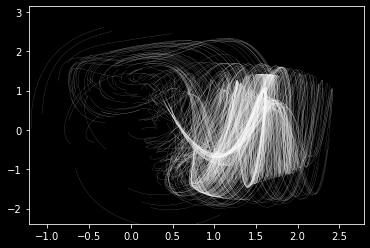

In [48]:
plt.plot(sol[:2000, -30:, 0].T, 
         sol[:2000, -30:, 1].T, 
         'w',
         linewidth=0.1
        );
plt.xlim([0.6*np.min(sol[..., 0]), 0.8*np.max(sol[..., 0])])
plt.ylim([0.8*np.min(sol[..., 1]), np.max(sol[..., 1])])

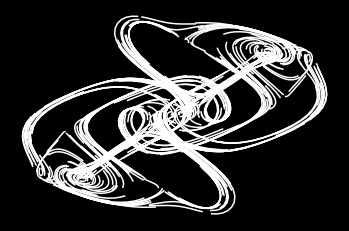

In [120]:
plt.plot(sol[:, 80:90, 0].T, sol[:, 80:90, 1].T, 'w');
dg.vanish_axes()

In [ ]:
def plot3d_shadow(x, y, z):
    """
    A 2D line plot with depth shadowing
    """
    # assign gradient to a line drawing
    
    
def rotate_coords():
    """
    If a list of angular coordinates is passed, then each coordinate is individually
    shifted by a spacified amount
    """
    


# Training videos

### Run training and record intermediate results

In [139]:
import darts 
from darts import TimeSeries
from darts.models import RNNModel, TransformerModel, NBEATSModel

from dysts.flows import Lorenz
import pandas as pd


# hyperparams = {
#     "input_chunk_length": 25, 
#     "output_chunk_length": 1, 
#     "random_state": 0
# }
# model = TransformerModel(optimizer_kwargs={"lr": 3e-6}, **hyperparams)
        
hyperparams = {
    "input_chunk_length": 100, 
    "output_chunk_length": 1, 
    "random_state": 0
}
model = NBEATSModel(optimizer_kwargs={"lr": 3e-6}, **hyperparams)

# hyperparams = {
#     "input_chunk_length": 50, 
#     "output_chunk_length": 1, 
#     "model": "LSTM", 
#     "n_rnn_layers": 2, 
#     "random_state": 0
# }
# model = RNNModel(optimizer_kwargs={"lr": 1e-5}, **hyperparams)


forecast_length = 500

total_epochs = 1000
epochs_between_snaps = 1


## Make training data
equation = Lorenz()
t_all, sol = equation.make_trajectory(1500, resample=True, return_times=True)
y_train, y_test = sol[:-forecast_length, :], sol[-forecast_length:, :]
t_train, t_test = t_all[:-forecast_length], t_all[-forecast_length:]

center, scale = np.mean(y_train, axis=0), np.std(y_train, axis=0)
y_train = (y_train - center) / scale
y_test = (y_test - center) / scale

y_train_ts = TimeSeries.from_dataframe(pd.DataFrame(y_train))

# y_test.dump("private_archive/true.pkl")

all_preds = list()
for i in range(total_epochs // epochs_between_snaps):
    
    if i % 50 == 0:
        print(i, flush=True)
    
    model.fit(y_train_ts, epochs=epochs_between_snaps);
    
    y_train_pred = model.predict(forecast_length, series=y_train_ts)
    
    y_val_pred = model.predict(forecast_length, series=y_train_ts)
    y_val_pred = np.squeeze(y_val_pred.values())
    
    all_preds.append(np.copy(y_val_pred))
    
    np.array(all_preds).dump("private_archive/nbeats.pkl")

all_preds = np.array(all_preds)

0


[2021-10-07 13:43:22,605] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 13:43:22,605] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 13:43:22,658] INFO | darts.models.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-07 13:43:22,658] INFO | darts.models.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-07 13:43:34,654] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 13:43:34,654] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 13:43:46,474] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 13:43:46,474] INFO | darts.models.torch_forecasting_mode

50


[2021-10-07 13:53:29,404] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 13:53:29,404] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 13:53:41,463] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 13:53:41,463] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 13:53:53,819] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 13:53:53,819] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 13:54:05,996] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 13:54:05,996] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 13:54:18,144] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 13:54:18,144] IN

100


[2021-10-07 14:03:40,276] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:03:40,276] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:03:52,486] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:03:52,486] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:04:04,724] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:04:04,724] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:04:17,476] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:04:17,476] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:04:30,263] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:04:30,263] IN

150


[2021-10-07 14:13:56,050] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:13:56,050] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:14:08,295] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:14:08,295] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:14:21,096] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:14:21,096] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:14:33,555] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:14:33,555] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:14:45,704] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:14:45,704] IN

200


[2021-10-07 14:24:10,491] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:24:10,491] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:24:22,658] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:24:22,658] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:24:34,855] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:24:34,855] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:24:47,188] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:24:47,188] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:24:59,369] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:24:59,369] IN

250


[2021-10-07 14:34:24,896] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:34:24,896] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:34:37,088] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:34:37,088] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:34:49,409] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:34:49,409] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:35:02,007] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:35:02,007] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:35:14,395] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:35:14,395] IN

300


[2021-10-07 14:44:47,556] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:44:47,556] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:44:59,939] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:44:59,939] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:45:12,314] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:45:12,314] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:45:24,838] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:45:24,838] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:45:37,295] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:45:37,295] IN

350


[2021-10-07 14:55:06,371] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:55:06,371] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:55:18,777] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:55:18,777] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:55:31,141] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:55:31,141] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:55:43,567] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:55:43,567] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:55:56,195] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 14:55:56,195] IN

400


[2021-10-07 15:05:29,508] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:05:29,508] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:05:41,928] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:05:41,928] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:05:54,360] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:05:54,360] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:06:06,949] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:06:06,949] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:06:19,367] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:06:19,367] IN

450


[2021-10-07 15:15:51,744] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:15:51,744] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:16:04,134] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:16:04,134] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:16:16,492] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:16:16,492] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:16:28,954] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:16:28,954] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:16:41,420] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:16:41,420] IN

500


[2021-10-07 15:26:15,017] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:26:15,017] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:26:27,543] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:26:27,543] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:26:40,299] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:26:40,299] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:26:52,678] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:26:52,678] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:27:05,000] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:27:05,000] IN

550


[2021-10-07 15:36:38,803] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:36:38,803] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:36:51,150] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:36:51,150] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:37:03,494] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:37:03,494] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:37:16,147] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:37:16,147] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:37:28,490] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:37:28,490] IN

600


[2021-10-07 15:47:00,877] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:47:00,877] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:47:13,301] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:47:13,301] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:47:25,943] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:47:25,943] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:47:38,381] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:47:38,381] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:47:50,629] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:47:50,629] IN

650


[2021-10-07 15:57:23,665] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:57:23,665] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:57:36,032] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:57:36,032] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:57:48,413] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:57:48,413] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:58:00,805] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:58:00,805] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:58:13,338] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 15:58:13,338] IN

700


[2021-10-07 16:07:45,666] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:07:45,666] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:07:58,111] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:07:58,111] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:08:11,266] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:08:11,266] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:08:23,619] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:08:23,619] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:08:35,994] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:08:35,994] IN

750


[2021-10-07 16:18:10,340] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:18:10,340] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:18:22,786] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:18:22,786] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:18:35,261] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:18:35,261] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:18:47,760] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:18:47,760] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:19:01,066] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:19:01,066] IN

800


[2021-10-07 16:28:35,476] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:28:35,476] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:28:47,821] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:28:47,821] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:29:00,185] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:29:00,185] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:29:12,629] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:29:12,629] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:29:25,056] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:29:25,056] IN

850


[2021-10-07 16:38:58,158] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:38:58,158] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:39:10,632] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:39:10,632] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:39:23,091] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:39:23,091] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:39:35,692] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:39:35,692] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:39:48,295] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:39:48,295] IN

900


[2021-10-07 16:49:20,344] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:49:20,344] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:49:33,374] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:49:33,374] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:49:45,917] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:49:45,917] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:49:58,702] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:49:58,702] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:50:11,112] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:50:11,112] IN

950


[2021-10-07 16:59:46,638] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:59:46,638] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:59:59,159] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 16:59:59,159] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 17:00:11,555] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 17:00:11,555] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 17:00:23,887] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 17:00:23,887] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 17:00:36,278] INFO | darts.models.torch_forecasting_model | Train dataset contains 900 samples.
[2021-10-07 17:00:36,278] IN

In [137]:
# all_preds.dump("private_archive/node.pkl")

In [134]:
import torch
import torch.optim as optim
from torchdiffeq import odeint

from resources.node import ODEFunc
from resources.node_utils import BatchLoader, get_train_test

niters = 1000

bt = BatchLoader(y_train, 30, tpts=t_train, batch_size=128)

func = ODEFunc(sol.shape[-1]).to(bt.device)
optimizer = optim.Adam(func.parameters(), lr=1e-3)

all_preds = list()
loss_history = list()
for itr in range(niters):
    if itr % 5 == 0:
        print(itr, flush=True)
    optimizer.zero_grad()
    batch_y0, batch_t, batch_y = bt.get_batch()
    pred_y = odeint(func, batch_y0, batch_t).to(bt.device)
    loss = torch.mean(torch.square(pred_y - batch_y))  # MSE
    loss.backward()
    loss_history.append(float(loss.detach()))
    optimizer.step()
    
    pred_y_long = odeint(func, 
                         torch.from_numpy(y_train.astype(np.float32))[-1], 
                         torch.from_numpy(np.hstack([t_train[-1], t_test]).astype(np.float32))
                        ).to(bt.device)
    
    all_preds.append(np.copy(pred_y_long.detach().numpy()[-forecast_length:]))
    
#     if itr>40: break
        
all_preds = np.array(all_preds)
plt.plot(loss_history)

0
5
10
15
20
25
30
35
40
45
50
55
60
65


KeyboardInterrupt: 

In [131]:
# all_preds = (all_preds - np.mean(all_preds, axis=1)[:, None, :]) / np.std(all_preds, axis=1)[:, None, :]
all_preds.dump("private_archive/node.pkl")

### Plot results

In [140]:
import degas as dg
plt.style.use('dark_background')

In [141]:
# np.array(all_preds).dump("private_archive/nbeats.pkl")
# all_preds.dump("private_archive/lstm.pkl")
all_preds_nbeats = np.load("private_archive/nbeats.pkl", allow_pickle=True)
all_preds_lstm = np.load("private_archive/lstm.pkl", allow_pickle=True)
all_preds_trans = np.load("private_archive/transformer.pkl", allow_pickle=True)
all_preds_node = np.load("private_archive/node.pkl", allow_pickle=True)

y_test = np.load("private_archive/true.pkl", allow_pickle=True)

In [ ]:
a^b = c

log_a(c) = b

In [144]:
import scipy.interpolate

ntpts = all_preds_node.shape[0]
ntpts = 1500

view_ind_vals = np.arange(ntpts)  # linear spacing
## Log spaced viewpoints
view_ind_vals = (np.logspace(0, np.log10(ntpts), 10 * 20) - 1).astype(int)
view_ind_vals = np.unique((np.logspace(0, np.log10(ntpts), 25 * 20) - 1).astype(int))

view_ind_vals = np.logspace(0, 
                            np.log(ntpts), 
                            10 * 20,
                           base=np.e) - 1
view_ind_vals[-1] = ntpts

# view_ind_vals = np.linspace(0, ntpts - 1, 10 * 20)

for i, view_ind in enumerate(view_ind_vals):

    plt.plot(y_test[:, 0] - 2.2, y_test[:, 2], color=[0.25, 0.25, 0.25], linewidth=2)
    plt.plot(y_test[:, 0] + 2.2, y_test[:, 2], color=[0.25, 0.25, 0.25], linewidth=2)
    plt.plot(
        y_test[:, 0] - 2.2, y_test[:, 2] + 4, color=[0.25, 0.25, 0.25], linewidth=2
    )
    plt.plot(
        y_test[:, 0] + 2.2, y_test[:, 2] + 4, color=[0.25, 0.25, 0.25], linewidth=2
    )
    

    dataf = scipy.interpolate.interp1d(
        np.linspace(0, ntpts, len(all_preds_node[:])),
        all_preds_node[:], 
        axis=0
    )
    plt.plot(
        dataf(view_ind)[:, 0] - 2.2,
        dataf(view_ind)[:, 2],
        linewidth=2,
        color=dg.pastel_rainbow[4],
    )
#     plt.plot(
#         all_preds_node[view_ind, :, 0] - 2.2,
#         all_preds_node[view_ind, :, 2],
#         linewidth=2,
#         color=dg.pastel_rainbow[4],
#     )
    plt.text(-3.0, -2.15, "Neural ODE", color=dg.pastel_rainbow[4])

    dataf = scipy.interpolate.interp1d(
        np.linspace(0, ntpts, len(all_preds_trans[:])),
        all_preds_trans[:], 
        axis=0
    )
    plt.plot(
        dataf(view_ind)[:, 0] - 2.2,
        dataf(view_ind)[:, 2] + 4,
        linewidth=2,
        color=dg.pastel_rainbow[0],
    )
#     plt.plot(
#         all_preds_trans[view_ind, :, 0] - 2.2,
#         all_preds_trans[view_ind, :, 2] + 4,
#         linewidth=2,
#         color=dg.pastel_rainbow[0],
#     )
    plt.text(-3.0, -2.15 + 4, "Transformer", color=dg.pastel_rainbow[0])

    dataf = scipy.interpolate.interp1d(
        np.linspace(0, ntpts, len(all_preds_lstm[70:])),
        all_preds_lstm[70:], 
        axis=0
    )
    plt.plot(
        dataf(view_ind)[:, 0] + 2.2,
        dataf(view_ind)[:, 2],
        linewidth=2,
        color=dg.pastel_rainbow[7],
    )
#     plt.plot(
#         all_preds_lstm[view_ind, :, 0] + 2.2,
#         all_preds_lstm[view_ind, :, 2],
#         linewidth=2,
#         color=dg.pastel_rainbow[7],
#     )
    plt.text(1.8, -2.15, "LSTM", color=dg.pastel_rainbow[7])

    dataf = scipy.interpolate.interp1d(
        np.linspace(0, ntpts, len(all_preds_nbeats[:])), 
        all_preds_nbeats[:], 
        axis=0
    )
    plt.plot(
        dataf(view_ind)[:, 0]  + 2.2,
        dataf(view_ind)[:, 2] + 4,
        linewidth=2,
        color=dg.pastel_rainbow[3],
    )
#     plt.plot(
#         all_preds_nbeats[view_ind, :, 0] + 2.2,
#         all_preds_nbeats[view_ind, :, 2] + 4,
#         linewidth=2,
#         color=dg.pastel_rainbow[3],
#     )
    plt.text(1.7, -2.15 + 4, "NBEATS", color=dg.pastel_rainbow[3])
    plt.xlim([-4.4, 4.4])
    plt.ylim([-2.0, 6.4])
    dg.fixed_aspect_ratio(1 / 1.5)
    dg.vanish_axes()

    dg.better_savefig("private_dump/predict_videos/frame_" + str(i).zfill(4) + ".png")

    plt.close()